Install XGBoost

In [40]:
!pip install xgboost==0.90

You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In the mushroom notebook, we explored the dataset, converted categorical values to numeric values, the created training and validation datasets by randomizing the data. This produced two files used by this notebook:

* mushroom_train.csv
* mushroom_validation.csv

In [41]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
columns = ['class','cap-shape', 'cap-surface','cap-color', 'bruises','odor',
          'gill-attachment','gill-spacing','gill-sizing','gill-color','stalk-shape','stalk-root',
          'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
          ' veil-type',' veil-color','ring-number','ring-type', 'spore-print-color',
          'population','habitat']

In [43]:
train_file = 'mushroom_train.csv'
validation_file = 'mushroom_validation.csv'

In [44]:
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [45]:
df_train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-sizing,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,2,1,5,1,0,0,7,...,2,6,6,0,2,1,4,3,4,0
1,0,3,2,3,0,5,1,1,0,10,...,1,7,7,0,2,2,4,7,3,1
2,1,5,3,3,0,2,1,0,0,7,...,1,4,6,0,2,1,2,1,5,4
3,0,5,3,3,1,5,1,0,0,9,...,2,6,3,0,2,1,4,2,5,0
4,1,2,2,5,1,5,1,0,0,10,...,2,7,7,0,2,2,4,5,4,3


In [46]:
df_validation.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-sizing,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,5,1,0,1,3,...,0,7,7,0,2,1,1,1,4,0
1,1,2,3,2,0,7,1,0,1,0,...,2,7,6,0,2,1,0,7,4,2
2,0,2,3,4,0,5,1,1,1,10,...,2,7,4,0,2,1,0,7,4,2
3,0,0,3,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,2,2,1
4,0,5,2,8,1,3,1,0,0,10,...,2,7,7,0,2,1,4,2,3,1


In [47]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [48]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-sizing,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,2,1,5,1,0,0,7,1,...,2,6,6,0,2,1,4,3,4,0
1,3,2,3,0,5,1,1,0,10,0,...,1,7,7,0,2,2,4,7,3,1
2,5,3,3,0,2,1,0,0,7,0,...,1,4,6,0,2,1,2,1,5,4
3,5,3,3,1,5,1,0,0,9,1,...,2,6,3,0,2,1,4,2,5,0
4,2,2,5,1,5,1,0,0,10,0,...,2,7,7,0,2,2,4,5,4,3


In [49]:
classifier = xgb.XGBClassifier (objective="binary:logistic")

In [50]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [51]:
classifier.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'],
               early_stopping_rounds=10)

[0]	validation_0-logloss:0.610434	validation_1-logloss:0.611078
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.542728	validation_1-logloss:0.543911
[2]	validation_0-logloss:0.486302	validation_1-logloss:0.488023
[3]	validation_0-logloss:0.438752	validation_1-logloss:0.440936
[4]	validation_0-logloss:0.39779	validation_1-logloss:0.399403
[5]	validation_0-logloss:0.362547	validation_1-logloss:0.364615
[6]	validation_0-logloss:0.327654	validation_1-logloss:0.33016
[7]	validation_0-logloss:0.297445	validation_1-logloss:0.300254
[8]	validation_0-logloss:0.271186	validation_1-logloss:0.274391
[9]	validation_0-logloss:0.248231	validation_1-logloss:0.251695
[10]	validation_0-logloss:0.228147	validation_1-logloss:0.231862
[11]	validation_0-logloss:0.207475	validation_1-logloss:0.210721
[12]	validation_0-logloss:0.18957	validation_1-logloss:0.192433
[13

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [52]:
eval_result = classifier.evals_result()

In [53]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [54]:
print(training_rounds)

range(0, 100)


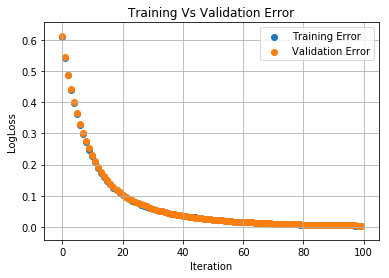

In [55]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

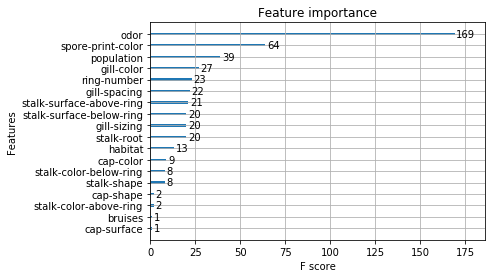

In [56]:
xgb.plot_importance(classifier)
plt.show()

In [57]:
df = pd.read_csv(validation_file,names=columns)

In [58]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-sizing,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,5,1,0,1,3,...,0,7,7,0,2,1,1,1,4,0
1,1,2,3,2,0,7,1,0,1,0,...,2,7,6,0,2,1,0,7,4,2
2,0,2,3,4,0,5,1,1,1,10,...,2,7,4,0,2,1,0,7,4,2
3,0,0,3,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,2,2,1
4,0,5,2,8,1,3,1,0,0,10,...,2,7,7,0,2,1,4,2,3,1


In [59]:

X_test = df.iloc[:,1:]

In [60]:
result = classifier.predict(X_test)

/Users/ds/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
result[:5]

array([0, 1, 0, 0, 0])

In [62]:
df['predicted_class'] = result

In [63]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-sizing,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,predicted_class
0,0,2,3,8,0,5,1,0,1,3,...,7,7,0,2,1,1,1,4,0,0
1,1,2,3,2,0,7,1,0,1,0,...,7,6,0,2,1,0,7,4,2,1
2,0,2,3,4,0,5,1,1,1,10,...,7,4,0,2,1,0,7,4,2,0
3,0,0,3,9,1,0,1,0,0,4,...,7,7,0,2,1,4,2,2,1,0
4,0,5,2,8,1,3,1,0,0,10,...,7,7,0,2,1,4,2,3,1,0


In [64]:
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [65]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [66]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [67]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['class'], df['predicted_class'],labels=[1,0])

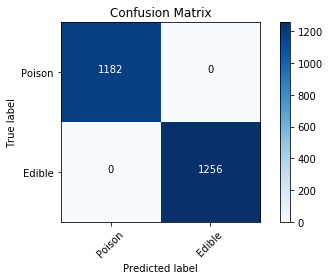

In [68]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Poison','Edible'],
                      title='Confusion Matrix')


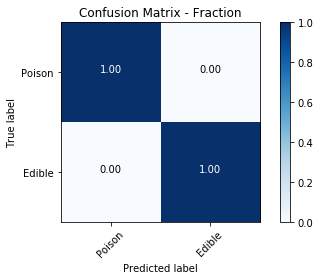

In [69]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Poison','Edible'],
                      title='Confusion Matrix - Fraction', normalize=True)


In [70]:
metrics = [binary_classifier_metrics(df['class'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [71]:
df_metrics

,Accuracy,F1,FalseNegative,FalseNegativeRate,FalsePositive,FalsePositiveRate,Negative,Positive,Precision,Recall,TrueNegative,TrueNegativeRate,TruePositive
Model,1.0,1.0,0,0.0,0,0,1256,1182,1.0,1.0,1256,1.0,1182


In [72]:
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model          1182              0              0          1256

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model     1.0                0.0                  0               1.0

       Precision  Accuracy   F1
Model        1.0       1.0  1.0


In [73]:
print(classification_report(
    df['class'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Poison','Edible']))

             precision    recall  f1-score   support

     Poison       1.00      1.00      1.00      1182
     Edible       1.00      1.00      1.00      1256

avg / total       1.00      1.00      1.00      2438

